![image](resources/qcqh-lab-header.png)

# Single-qubit and multi-qubit state

> Adapted by *Emmanuel Calvet*

> From Lab 1 of [**Introduction to Quantum Computing and Quantum Hardware**](https://qiskit.org/learn/intro-qc-qh/).
---

In this lab, you will learn how to write `Qiskit` code and investigate single-qubit and multi-qubit states using the `bloch-sphere` and `qpshere` visualization.

If you have not used Jupyter notebooks before, take a look at the following video to quickly get started.
- https://www.youtube.com/watch?v=jZ952vChhuI

Remember, to run a cell in Jupyter notebooks, you press `Shift` + `Return/Enter` on your keyboard.
To add a cell, press `alt` + `Return/Enter`.

Before we begin, you will need to install some prerequisites into your environment. Run the cell below to complete these installations. At the end, the cell outputs will be cleared.

In [50]:
from IPython.display import clear_output
clear_output()


# Single-qubit states

The way we represent a state of a quantum qubit $|\psi\rangle$ is:

$$\sqrt{1-p}\vert0\rangle + e^{i\phi}\sqrt{p}\vert1\rangle$$

Here, $p$ is the probability that a measurement of the state in the computational basis $\{\vert0\rangle, \vert1\rangle\}$ will have the outcome $1$, and $\phi$ is the phase between the two computational basis states. 

Single-qubit gates can then be used to manipulate this quantum state by changing either $p$, $\phi$, or both.


Let's begin by creating a single-qubit quantum circuit. We can do this in `Qiskit` using the following:

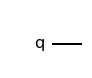

In [51]:
from qiskit import QuantumCircuit
import warnings
warnings.filterwarnings('ignore')

mycircuit = QuantumCircuit(1)
mycircuit.draw('mpl')

The above quantum circuit does not contain any gates; therefore, if you start in any state, say $\vert0\rangle$, applying this circuit to your state doesn't change the state. 

To see this clearly, let's create the state vector $\vert0\rangle$. In `Qiskit,` you can do this using the following:

In [52]:
from qiskit.quantum_info import Statevector

sv = Statevector.from_label('0')

You can see what's contained in the object `sv`:

In [53]:
sv

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


A qubit is a vector state is a two-dimensional complex vector :

$$\vert0\rangle = \begin{bmatrix} 1 \\0 \end{bmatrix} $$

We can now apply the quantum circuit `mycircuit` to this state by using the following:

In [54]:
new_sv = sv.evolve(mycircuit)

Once again, you can look at the new statevector by writing

In [55]:
new_sv

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


As you see, the state didn't change.

## The Bloch sphere

A way to represent the state of one qubit is the `Bloch sphere`.

This map the vector state $|\psi\rangle=\alpha|0\rangle+e^{i\phi}\beta|1\rangle$ with $\alpha, \beta \in \mathbb{R}$

Since we have the normalization condition imposing $\sqrt{\alpha^2+\beta^2}=1$,

By applying the trigonometry formula $\sqrt{cos(x)^2+sin(x)^2}=1$

And using the half angle formula in order to get $\alpha$ and $\beta$
dependant of the same parameter $\theta$, we derive that :
$|\psi\rangle=cos(\theta/2)|0\rangle+e^{i\phi}sin(\theta/2)|1\rangle$
- $\phi \in [0, 2\pi]$ describes the relative phase
- $\theta \in [0, \pi]$ describes the probability to measure $|0\rangle$ or $|1\rangle$.

We can illustrate a state on the surface of a sphere with radius $|\vec r|=1$, which we call the <mark>Bloch sphere</mark>, with a block vector of polar coordinates : 

$$\vec r = \begin{pmatrix} sin\theta \times cos\phi \\ sin\theta \times sin\phi \\ cos\theta \end{pmatrix}$$


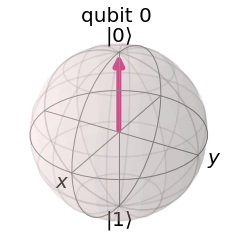

In [56]:
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector

plot_bloch_multivector(new_sv.data)

As you can see, the state $|0\rangle$ gets projected on the sphere's north pole. Notice that the angle $\theta$ is divided by 2. This means that the orthogonal basis $(|0\rangle, |1\rangle)$ is stretched in the Bloch sphere, and each vector is now separated by an angle of $2\times90=180$ degree.

## Our first gate!

Mathematically, a gate is a matrix; a single qubit matrix applies to the two-dimensional state and transforms this state into a new one; hence it's a $2\times2$ matrix.

Here are is the mathematical definitions of the $X$ gate
$$\sigma_x= \begin{vmatrix}0 & 1 \\ 1 & 0 \end{vmatrix}=|0\rangle \langle1|+|1\rangle \langle0|$$

If we apply the $X$ gate to our initial state $|0\rangle$ we obtain:
$$\sigma_x|0>=\begin{vmatrix}0 & 1 \\ 1 & 0 \end{vmatrix} \cdot \begin{pmatrix}1 \\ 0 \end{pmatrix}= \begin{pmatrix}0 \\ 1 \end{pmatrix}=|1>$$

The $X$ gate flips the qubit from the state $\vert0\rangle$ to the state $\vert1\rangle$. We will first create a single-qubit quantum circuit with the $X$ gate to see this:

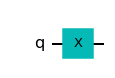

In [57]:
mycircuit = QuantumCircuit(1)
mycircuit.x(0)

mycircuit.draw('mpl')

Now, we can apply this circuit onto our state by writing

In [58]:
sv = Statevector.from_label('0')
new_sv = sv.evolve(mycircuit)
new_sv

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


As you can see, the statevector now corresponds to that of the state $\vert1\rangle$. Recall that

$$\vert1\rangle = \begin{bmatrix}0\\1\end{bmatrix}$$

Recall that the states $\vert0\rangle$ and $\vert1\rangle$ are orthogonal. Therefore, $\langle0\vert1\rangle = 0$. The state can be shown on the `qsphere` by writing

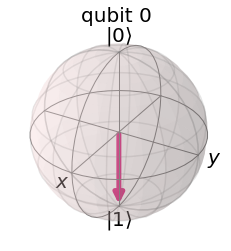

In [59]:
plot_bloch_multivector(new_sv.data)

## Superposition
These previous states are no different from classical bits.

Now, by applying a Hadamard gate, we will create a state that is only possible in the quantum realm, a superposed state:
$$\frac{1}{\sqrt{2}}\left(\vert0\rangle + \vert1\rangle\right)$$

This state is a linear combination of two possible outcomes, $|0\rangle$ and $|1\rangle$.


To create the state, we will need the Hadamard gate, given by the following equations:
$$
H=\frac{1}{\sqrt{2}}
\begin{bmatrix}
1 & 1 &\\
1 & -1 &\\
\end{bmatrix}=\frac{1}{\sqrt{2}}\left( |0\rangle\langle0|+|0\rangle\langle1|+|1\rangle\langle0|-|1\rangle\langle1| \right)$$


 Here is how we can create this state and visualize it in `Qiskit`:

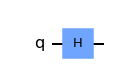

In [60]:
sv = Statevector.from_label('0')
mycircuit = QuantumCircuit(1)
mycircuit.h(0)
mycircuit.draw('mpl')

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


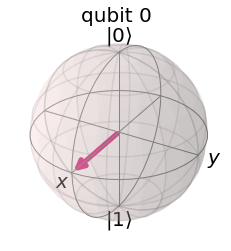

In [61]:
new_sv = sv.evolve(mycircuit)
print(new_sv)
plot_bloch_multivector(new_sv.data)

As you can see above, the state is now a superposition of both basis vector $\vert0\rangle$ and $\vert1\rangle$, with an equal probability, $p=0.5$. 

The `Hadamard` gate rotated the vector state around the **y** axis, of an angle $\frac{\pi}{2}$.

We can also create other superpositions with different phases. 

Let's create $$\frac{1}{\sqrt{2}}\left(\vert0\rangle - \vert1\rangle\right)$$ which can be done by applying the Hadamard gate on the state $\vert1\rangle$.

Statevector([ 0.70710678+0.j, -0.70710678+0.j],
            dims=(2,))


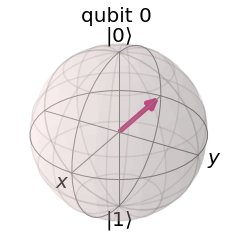

In [62]:
sv = Statevector.from_label('1')
mycircuit = QuantumCircuit(1)
mycircuit.h(0)

new_sv = sv.evolve(mycircuit)
print(new_sv)
plot_bloch_multivector(new_sv.data)

This time, the vector was rotated to the phase of $\phi = \pi$. This is because the coefficient of $\vert1\rangle$ in the state $$\frac{1}{\sqrt{2}}\left(\vert0\rangle - \vert1\rangle\right)$$ is $-1$, which is equal to $e^{i\pi}$.

Other phases can also be created by applying different gates. The $T$ and $S$ gates apply phases of $+\pi/4$ and $+\pi/2$, respectively. The widget below helps you see different gates, and their actions on single-qubit quantum states.

You can play around with the `block-sphere` : [https://javafxpert.github.io/grok-bloch/](https://javafxpert.github.io/grok-bloch/))
![](resources/Bloch-sphere.png)

# What happens when we run the circuit?

In Quantum Computing (QC), you cannot directly get information from the qubits; you need to `measure` them, which will cause
a modification of their states!
- First, we use the command `QuantumCircuit(1,1)` to create the circuit. The first argument asks to create a quantum circuit containing one qubit, and the second argument adds one classical bit.
- Second, note that the `measure` command takes two arguments. The first argument is the set of qubits that will be measured. The second is the set of classical bits that will store the measurement.

*NB: Typically, in QC, the basis you measure is the **z** axis, and you cannot measure a state in superposition. You always project the qubit state with a measurable basis state $|0\rangle$ or $|1\rangle$. If ever you wanted to measure along another axis, you would have to rotate the state with the appropriate gate (for example, measurement along $x$, requires to put an $H$ gate before the measurement)*

Finally, you will need to create a `backend` and give it to the `execute` function along with your circuit.
- We will use `Qiskit`'s built-in `Aer` simulators to run the circuit. To get the measurement counts, we can use the following code:

{'0': 482, '1': 518}


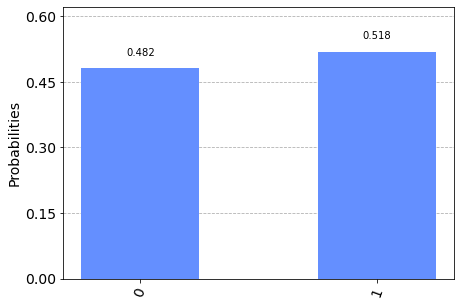

In [63]:
from qiskit import Aer, execute
from qiskit.visualization import  plot_histogram

# Create the circuit
mycircuit = QuantumCircuit(1, 1)
mycircuit.h(0)
mycircuit.measure(0, 0)

# Call a simulator backend
backend_sim = Aer.get_backend('qasm_simulator')
job = execute(mycircuit, backend_sim, shots=1000)

print(job.result().get_counts())
plot_histogram(job.result().get_counts())

## Measuse / projection

<mark>Born Rule</mark> : the probability that a state $|\psi\rangle$ collpases during a projective measurement onto the state $|x\rangle\in \left\{|0\rangle, |1\rangle \right\}$  is given by :
$$P(x) = {\left| \langle x|\psi\rangle\right|}^2$$
with $\sum_i{P(x_i)=1}$.

With the previous example, the state of the qubit is $|\psi\rangle= \frac{1}{\sqrt{2}} (|0\rangle + |1\rangle)$

Let's measure the probability of getting the qubit in the state $|0\rangle$ :
$${\left| \langle 0|\psi\rangle\right|}^2=\frac{1}{2} {\left| \langle 0|(|0\rangle + |1\rangle)\right|}^2$$
$$=\frac{1}{2} {\left| \langle 0|0\rangle + \cancel{\langle 0|1\rangle})\right|}^2$$
$$=\frac{1}{2} {\left| 1\right|}^2=\frac{1}{2}$$


# Multi-qubit states

Similar to the discussion above, you can also explore multi-qubit gates in `Qiskit`. 

We will demonstrate below how to create the Bell state, which is the fundamental adventage of QC, entanglement of qubits:

$$\frac{1}{\sqrt{2}}\left(\vert00\rangle + \vert11\rangle\right)$$ 

The state $\vert00\rangle$, means the two qubits are $|0\rangle$ on their respective basis, and form a multi-qubit basis. You can have as many qubit as you want in such basis $|00...0\rangle$.

We'll start by visualizing the state $\vert00\rangle$ using another tool, the `q-sphere`:

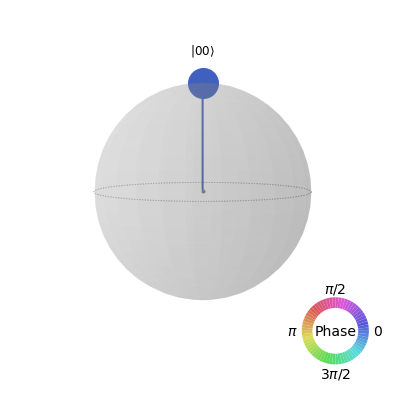

In [64]:
from qiskit.visualization import plot_state_qsphere

sv = Statevector.from_label('00')
plot_state_qsphere(sv.data)

Next, we use the Hadamard gate described above, along with a controlled-X gate, to create the Bell state.

The controlled-X gate is an X gate, that is applied if and only if the control-bit is in the $|1\rangle$ state. Mathematically this gives:

$$
CNOT=
\begin{vmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0\\
\end{vmatrix}=|00><00|+|01><01|+|10><11|+|11><10|$$

In `qiskit`, here is how you can create a bell state:

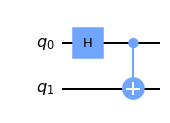

In [65]:
mycircuit = QuantumCircuit(2)
mycircuit.h(0)
mycircuit.cx(0,1)
mycircuit.draw('mpl')

Here the qubit $0$ is first put in a superposition of states, a linear combination $\frac{1}{\sqrt{2}}\left(\vert0\rangle + \vert1\rangle\right)$. 
Next, you apply a $CNOT$ on the second qubit $1$, controlling it with the qubit $0$, which is in superposition.

Since the second qubit state depends on a qubit in superposition, it becomes entangled with all possible states of the first qubit!

The result of this quantum circuit on the state $\vert00\rangle$ is thus:
 $$|\psi^{00}>=\frac{1}{\sqrt{2}}(|00>+|11>)$$

You can display it by writing:

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


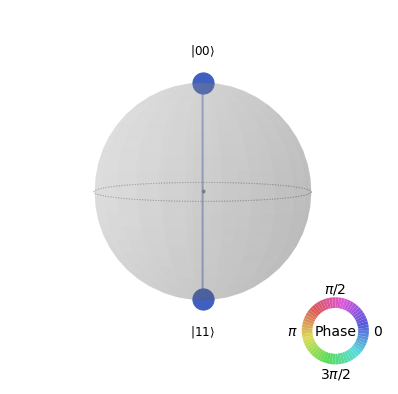

In [66]:
new_sv = sv.evolve(mycircuit)
print(new_sv)
plot_state_qsphere(new_sv.data)

As you will come to understand, entanglement is really one of the most important properties of quantum mechanics that is harnessed in QC. While a classical bit can remain in one state only, a quantum state with $n$ qubits can be entangled in possibly $2^n$ states. When performing computation, the challenge is to apply gates appropriately such that the output is the solution to your problem.

## Measurements

Here is an example that creates the same Bell state and applies a measurement.

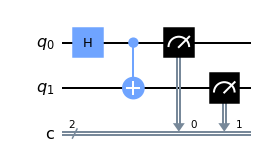

In [67]:
mycircuit = QuantumCircuit(2, 2)
mycircuit.h(0)
mycircuit.cx(0,1)
mycircuit.measure([0,1], [0,1])
mycircuit.draw('mpl')

In this example we used a CNOT gate again, here is the logic table :

|input|output|
|---|--------|
|x y| x x $\oplus$ y|
|0 0| 0  0 |
|0 1| 0  1 |
|1 0| 1  1 |
|1 1| 1  0 |

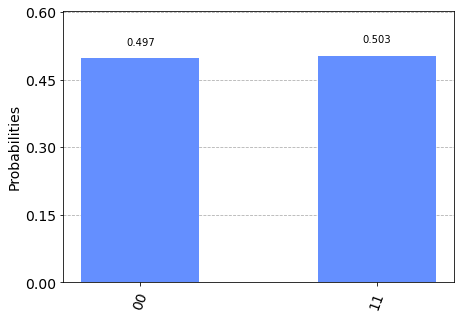

In [68]:
from qiskit import Aer, execute
simulator = Aer.get_backend('qasm_simulator')
result = execute(mycircuit, simulator, shots=10000).result()
counts = result.get_counts(mycircuit)
plot_histogram(counts)

# Parametrized circuit on a real quantum computer

In this example, we will take the same circuit and add a `parameter`, then `execute` it with many values in an actual quantum circuit.
- We create a parameter $\theta$ with the use of the class `Parameter`.
- We will use a gate $R_Y$, that performs rotation around the $y$ axis, that will be parametrized by $\theta$
- Then, we will add the bell state and measurements

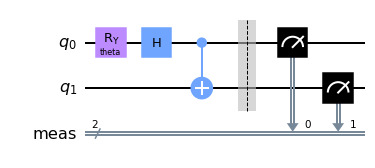

In [69]:
from qiskit.circuit import Parameter

theta = Parameter('theta') # Create a Parameter object 
qc = QuantumCircuit(2)
qc.ry(theta, 0) # Gates can be parametrized this way
qc.h(0)
qc.cx(0, 1)
qc.measure_all()
qc.draw('mpl')

Now we create a list of circuit with all different initialization of the parameter


In [70]:
import numpy as np

parameter_binds = {theta : 2*np.pi/3} # Dictionary 
qc_a = qc.assign_parameters(parameter_binds) # A quantum circuit with given parameter
 
thetas = np.linspace(0, 2*np.pi, 11)
qcs = list() 
for t in thetas: # You can create a list a circuit with various parameter values
    qcs.append(qc.assign_parameters({theta : t})) 

## Several things to note :
1. We can create a list and put circuits inside it, with various initialization of parameters
2. ```assign_parameters``` is a QuantumCircuit object method that allows you to give a value for parameters.
    - The arguments of this method is a ```dict```, of the parameter as a *key*, and given value as *value*.

# Connect to IBMQ

You need to log in your IBM account at the adress : [https://quantum-computing.ibm.com/](https://quantum-computing.ibm.com/)

Then in the first page, get your **API token**.

If you have trouble to connect, check to the qiskit [documentation](https://quantum-computing.ibm.com/lab/docs/iql/manage/account/ibmq).

In [71]:
from qiskit import IBMQ

Token = "YOUR_TOKEN" # Replace with your token
#IBMQ.save_account(token) # Uncoment the first time !
provider = IBMQ.load_account()

MissingOptionalLibraryError: "The 'qiskit-ibmq-provider' library is required to use 'IBMQ provider'. You can install it with 'pip install qiskit-ibmq-provider'."

Now we will load a backend with a real quantum computer !

Then we will load some usefull information about this circuit.

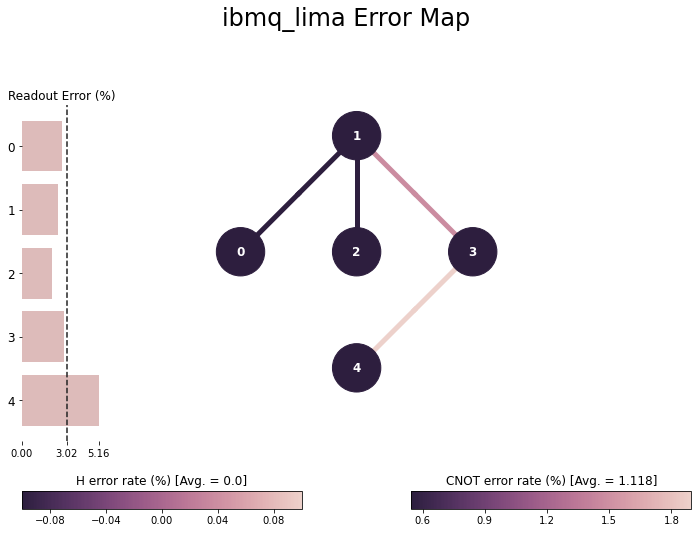

In [ ]:
from qiskit.visualization import plot_gate_map, plot_error_map

backend = provider.get_backend('ibmq_lima')
plot_error_map(backend)

Here you can check many interesting pieces of information:
1. The (%) of readout error of each qubit: You can select the qubit you want to use to minimize the error.
2. The (%) of error of the `H` and `CNOT` gate: Using too many gates can lead to high errors.
3. The circuit architecture: if you need to connect qubits that are not connected in the graph, you have to use `SWAP` gates. They are composed of three alternating `CNOT`, thus inducing even more errors!

In [ ]:
from qiskit.tools.monitor import job_monitor

job = execute(qcs, backend, shots=1024, initial_layout=[0, 1]) # Add the two qubit you probably should use from indexes [0, 1, 2, 3 4]
job_monitor(job) # Gives status of the job

Job Status: job has successfully run


If you gave a list of several circuits to be executed, you have to give the circuit as an argument of `get_counts` to get the result of the circuit you want!

In [ ]:
import matplotlib.pyplot as plt

circ = 1 # Select the circuit you want to display
plot = plot_histogram(job.result().get_counts(qcs[circ]))

# Additional reading

- You can watch a video on building a quantum teleportation quantum circuit here: https://www.youtube.com/watch?v=mMwovHK2NrE&list=PLOFEBzvs-Vvp2xg9-POLJhQwtVktlYGbY&index=6&t=0s

- The `1 minute Qiskit` episode entitled `What is the qsphere?` succinctly describes the Qsphere visualization tool that we used in this lab. You can find it here: https://youtu.be/4SoK2h4a7us